# 1. Introduction
American Community Survey (ACS) Public Use Microdata Sample (PUMS) covers features from each person such as age, education, housing situation, children and parent status at the [US Census Website](https://www.census.gov/programs-surveys/acs/technical-documentation/pums/documentation.html). After initially exploring trends of each induvial regarding their wage, this analysis looks to compare difference within five variables (Sex, Race, Education, Job, and Age) according to segmented categories within each. By normalizing for these key features, the goal is to be able to output quantified scores to compare wage difference between categories within the same variables (ex: comparing wage of a high school graduate vs. a MS graduate), and to derive any year to year trends observed.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import pkg_acs_analysis as acs

%load_ext autoreload
%autoreload 2

# 2. Final Analysis

The first notebook overviewed the initial exploration of the dataset for each year and outlined the functions that would go into the final analysis. There are five variables observed {SEX, AGE, JOB, EDU, RACE} with multiple categories within each variable. Each combination of categories from each variable is referred to as a subset. All functions are stored in the ACS_anlaysis_pkg and overview the cleaning, modeling, transformation, and visualization of initial dataset from the ACS PUMS data.

**ACS_analysis_pkg:**

    (a) Parsing each raw dataset from each year (2008-2018)
    (b) Preprocessing the data to fit for modeling and transformation
    (c) Fitting a model for predicting wages for each category and variable
    (d) Transforming the dataset for final analysis and create dummy dataset
    (e) Quantifying difference between wages by normalizing across population
    (f) Visualization of final output comparing categories and variables

The function, yearly_multibase_analysis is used to parse through each of the specified year, preprocess, fit a model, transform a dummy dataset that contains every possible category combination, quantify difference between every variable and each category between them. The outputted datasets are summarized values with breakdown of data in multiple formats that are used for further visualization and further analysis. For more detailed breakdown of the functioned used to transform the PUMS  dataset, explore the ACS_analysis_pkg to locate each function.

In [2]:
#Output: grouped df with seperate analysis for each year
yearly_sex_sep, yearly_sex_full, yearly_cat_full, yearly_group_df = \
    acs.yearly_multibase_analysis(2008, 2018)

#Example: analysis on grouped set of years
#set_sex_sep, set_sex_full, set_cat_full, set_group_df = \
    #acs.multiyear_multibase_analysis(2014, 2018)

#Example: single year analysis
#year_sex_sep, year_sex_full, year_cat_full, year_group_df = \
    #acs.singleyear_multibase_analysis(2018)

Completed Year: 2008  (6.48 min)
Completed Year: 2009  (6.55 min)
Completed Year: 2010  (6.02 min)
Completed Year: 2011  (6.05 min)
Completed Year: 2012  (6.0 min)
Completed Year: 2013  (6.64 min)
Completed Year: 2014  (6.05 min)
Completed Year: 2015  (5.78 min)
Completed Year: 2016  (6.06 min)
Completed Year: 2017  (6.58 min)
Completed Year: 2018  (6.81 min)


As a high level overview, to account for education, job industry, age, race and gender, each of these variables are normalized against one another when comparing categories within each variable. For instance, if 'B.S._Degree' was the base category from the education variable, all possible combinations of categories with in all other variables besides education and used as the subset in which their wages are predicted. With each subset's wage, the % count (Count Subset / Total Count of Base Category) of each subset in regards to the base variable is used as a weighted score so the sum of all subsets will quantify the wage difference of other categories within education against the base category 'B.S._Degree'.


\begin{align*}
R_{ComparevsBase} =
\sum \frac{W_{Compared Subset}}{W_{Base Subset}} \times 
\frac{C_{Base Subset}}{C_{Base Total}}
\end{align*}



\begin{align*}
W_{ComparevsBase} =
\sum W_{Compared Subset} \times 
\frac{C_{Base Subset}}{C_{Base Total}}
\end{align*}


Using the count for each base category allows the population distribution for each subset to be maintained during comparison. However, the difference between each category is observed to be minimal for low cardinality variables such as SEX. Therefore, the average of ratio, using the count distribution of males and females, is taken and averaged for the final values for the SEX variable.


\begin{align*}
R_{FM Average} =
(\sum \frac{W_{Female Subset}}{W_{Male Subset}} \times 
\frac{C_{Male Subset}}{C_{Male Total}} +
\sum \frac{W_{Female Subset}}{W_{Male Subset}} \times 
\frac{C_{Female Subset}}{C_{Female Total}}) / 2
\end{align*}



In [3]:
yearly_sex_sep.to_csv('data_output\yearly_sex_sep.csv')
yearly_sex_full.to_csv('data_output\yearly_sex_full.csv')
yearly_cat_full.to_csv('data_output\yearly_cat_full.csv')
yearly_group_df.to_csv('data_output\yearly_group_df.csv')

In [3]:
yearly_sex_sep = pd.read_csv('data_output\yearly_sex_sep.csv')
yearly_sex_full = pd.read_csv('data_output\yearly_sex_full.csv')
yearly_cat_full = pd.read_csv('data_output\yearly_cat_full.csv')
yearly_group_df = pd.read_csv('data_output\yearly_group_df.csv')

# 3. Visualization

Overall, it's clear that there's a difference in wages from between male and female across all variables even after normalization of age, sex, education, and race. The (1) first figures outline comparisons of each wages made by each subset and the differences between the male and female population for each. While the (2) second figure outlines which categories across all variables contain the most bias in wages for each gender.

Furthermore, To illuminate the breakdown in differences between each variable's effect of gender wage gap and general wage gap between categories within each variable, each variable had a set of graphs made especially for each. For each variable the graphs included are:

1. Heatplot - compare each category against each other to determine ratios difference (larger ratio means compared category pays more than the base)
2. Sex Wage Ratio vs. Year - quantify sex wage gap time for each category over the years
3. Female Working % vs. Year - quantify percent females in the work force for each category over the years

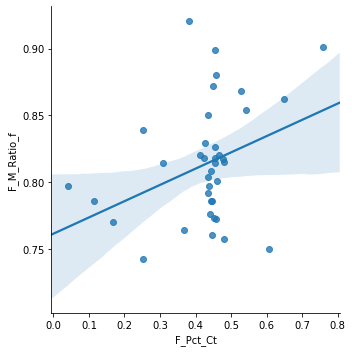

In [12]:
yearly_sex_full_18 = yearly_sex_full[(yearly_sex_full["Year"] == 2018)]
sns.lmplot(data=yearly_sex_full_18, x="F_Pct_Ct", y="F_M_Ratio_f", robust=True)

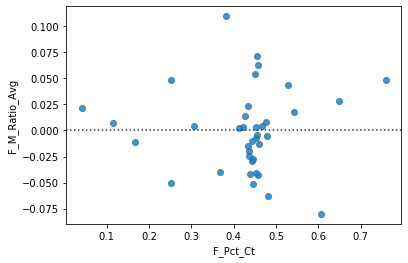

In [9]:
sns.residplot(data=yearly_sex_full_18, x="F_Pct_Ct", y="F_M_Ratio_Avg")

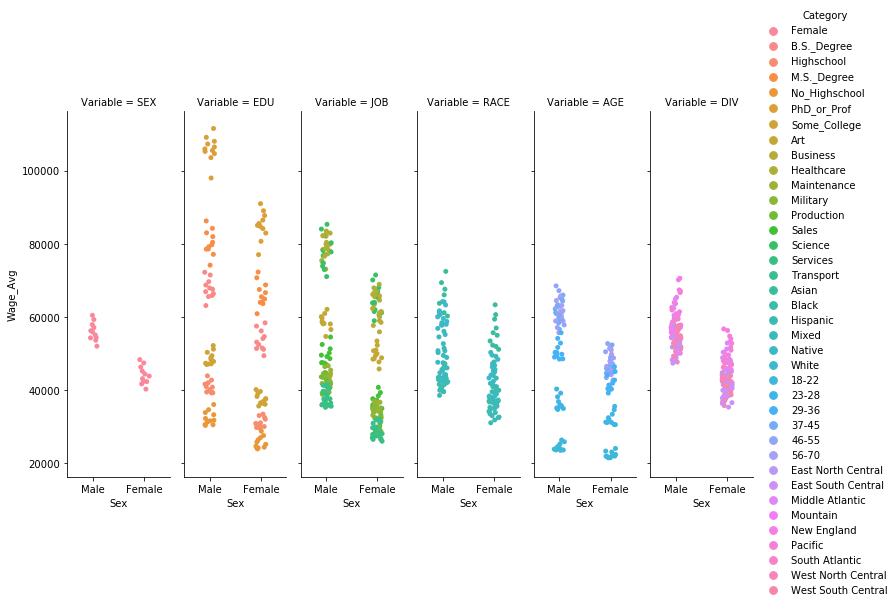

In [3]:
acs.plot_sex_n_cat(yearly_sex_sep)

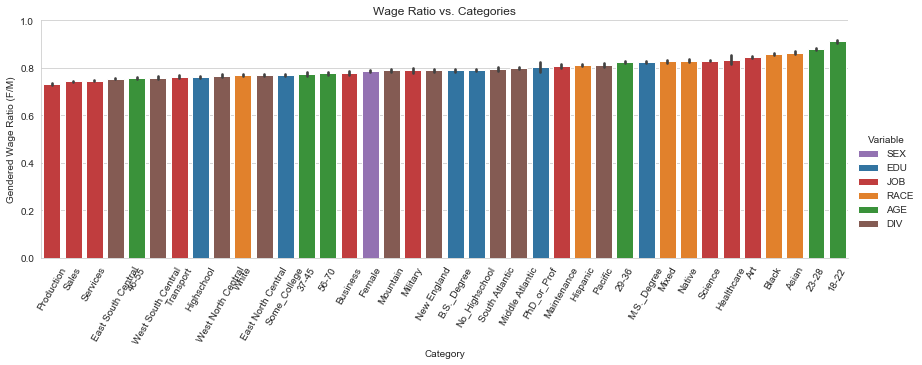

In [4]:
acs.plot_ratio_ordered(yearly_sex_full)

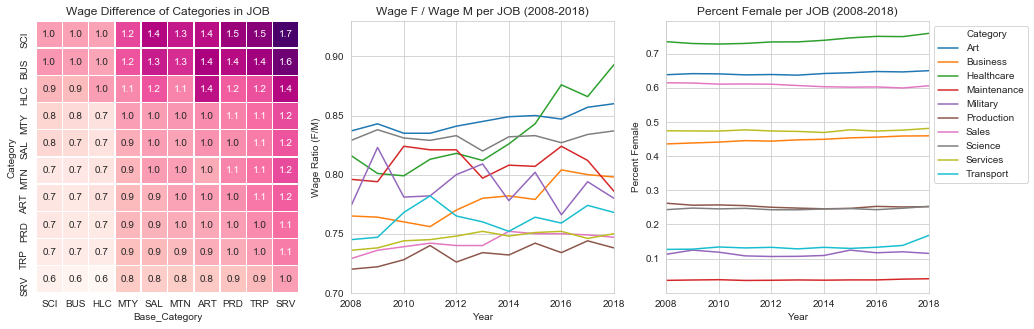

In [5]:
acs.plot_heatmap_lineplot(yearly_cat_full, yearly_sex_full, 'JOB')

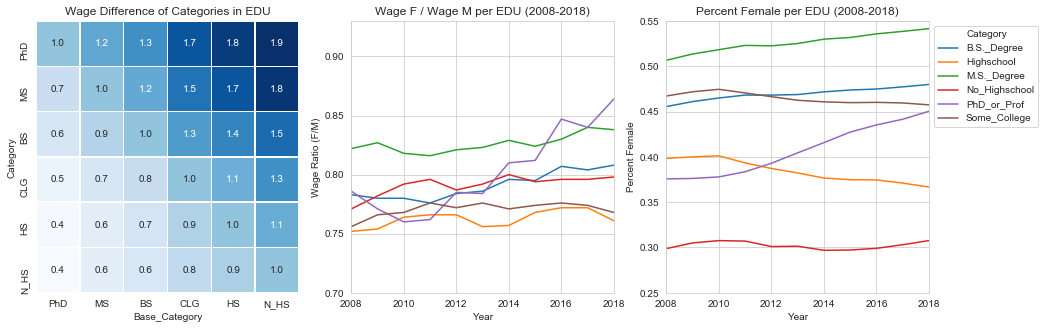

In [6]:
acs.plot_heatmap_lineplot(yearly_cat_full, yearly_sex_full, 'EDU')

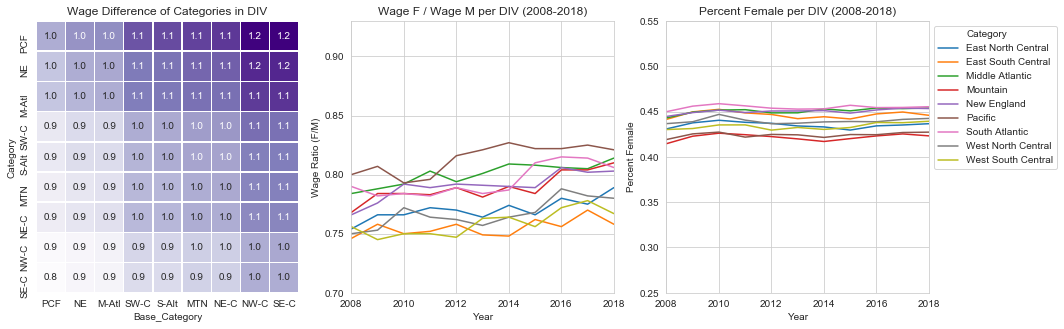

In [7]:
acs.plot_heatmap_lineplot(yearly_cat_full, yearly_sex_full, 'DIV')

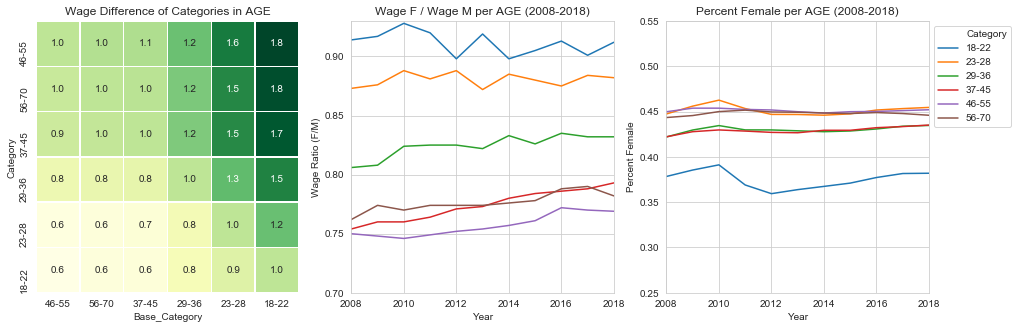

In [8]:
acs.plot_heatmap_lineplot(yearly_cat_full, yearly_sex_full, 'AGE')

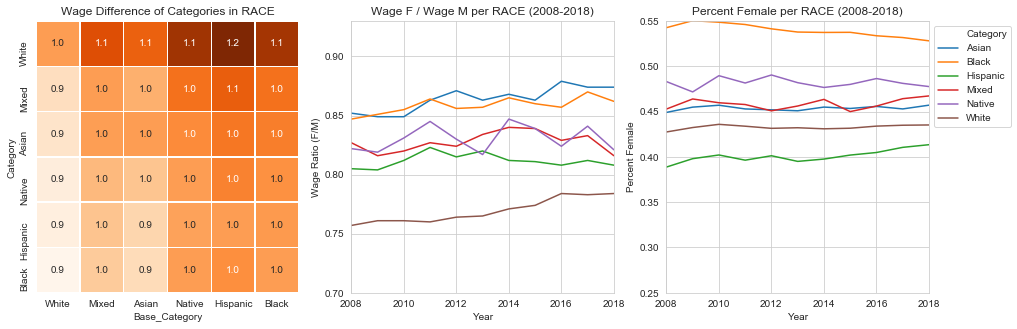

In [9]:
acs.plot_heatmap_lineplot(yearly_cat_full, yearly_sex_full, 'RACE')

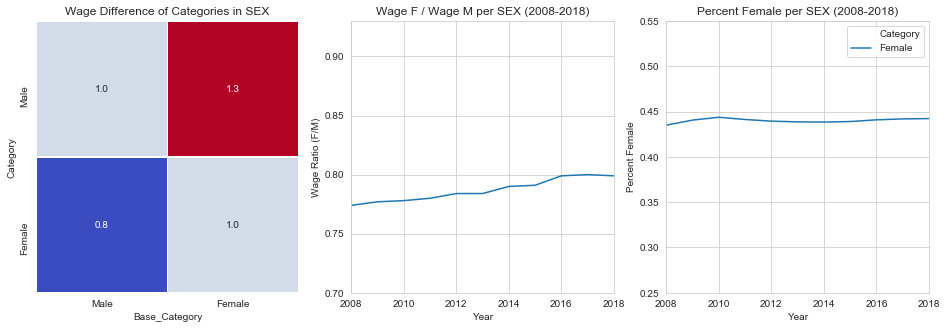

In [10]:
acs.plot_heatmap_lineplot(yearly_cat_full, yearly_sex_full, 'SEX')

# 4. Conclusion
Overall, it’s clear that there is a clear wage gap between men and woman across all races, occupations, ages, and education levels, but it differs to what extent. The main conclusions made were:

1.	Since wages were normalized across education, age, industry, and race, the factors for the wage gap observed are most likely due to difference in job titles and levels for a male and female equivalent. It can be observed that men are most likely landing higher level jobs and receiving more promotions compared to an equal female counterpart.

2.	Variable specific:<br/>
Industry: Healthcare is seeing reduced wage gap in a female dominated workforce<br/>
Education: PhD (or equivalent) jobs are seeing reduced wage gap and greater percentage of woman obtaining PhD<br/>
Age: Spike in females working in 2010 from ages 18-36 (could be from recession)<br/>
Race: Blacks, Asians, and White population see decrease in wage gap, but Hispanic and other don’t show decreasing trend <br/>
Sex: Overall, there seems to be a trend of decreasing wage gap from 77% to 80% from 2008 to 2018<br/>

3.	While there is a clear difference in wages for male and female equivalents, a clearer difference can be observed in wages for people with higher education and industry of work. Completing a bachelor’s degree raises a person’s salary by approximately 20k for both male and female compared to those with associates or some college education. Similarly, people in business, healthcare, or science see a large differentiation as well.

This model can be greatly improved with more job and person specific information to determine if the wage gap persists for people in the same roles, but for this study – it can hypothesized that on average, woman are not given or taking higher level positions which would pay more. This trend persists across education, race, occupation, and age but has slowly been evolving over the years.
